In [281]:

# from keras.datasets import cifar10
# import numpy as np

# # Load the cifar10 dataset
# (pixel_train, label_train), (pixel_test, label_test) = cifar10.load_data()

# #clean raw data
# label_train = label_train.flatten()
# label_test = label_test.flatten()
# pixel_train = np.sum(pixel_train, axis=-1)
# pixel_test = np.sum(pixel_test, axis=-1)

# #clean data (convert raw data to activation layer and final layer)
# x_train = np.array([elements.flatten()/765 for elements in pixel_train])
# x_test = np.array([elements.flatten()/765 for elements in pixel_test])

# y_train = np.zeros([label_train.shape[0],10])
# y_train[np.arange(0,label_train.shape[0]),label_train] = 1

# y_test = np.zeros([label_test.shape[0],10])
# y_test[np.arange(0,label_test.shape[0]),label_test] = 1


In [292]:

from keras.datasets import mnist
import numpy as np

# Load the MNIST dataset
(pixel_train, label_train), (pixel_test, label_test) = mnist.load_data()

#clean raw data
label_train = label_train.flatten()
label_test = label_test.flatten()
pixel_train = np.sum(pixel_train, axis=-1)
pixel_test = np.sum(pixel_test, axis=-1)

#clean data (convert raw data to activation layer and final layer)
x_train = np.array([elements.flatten()/255 for elements in pixel_train])
x_test = np.array([elements.flatten()/255 for elements in pixel_test])

y_train = np.zeros([label_train.shape[0],10])
y_train[np.arange(0,label_train.shape[0]),label_train] = 1

y_test = np.zeros([label_test.shape[0],10])
y_test[np.arange(0,label_test.shape[0]),label_test] = 1


In [ ]:
print

In [283]:
# import numpy as np
# x_train = np.linspace(0,1,50000)
# np.random.shuffle(x_train)
# x_train = x_train[:,np.newaxis]

# y_train = np.sin(5*x_train)

# x_test = np.linspace(0.001,0.999,150)
# np.random.shuffle(x_test)
# x_test = x_test[:,np.newaxis]

# y_test = np.exp(x_test-1)

In [ ]:
# import numpy as np
# train_data = [
#     [[0, 0, 0, 1], [1]],
#     [[0, 0, 1, 0], [1]],
#     [[0, 1, 0, 0], [1]],
#     [[0, 1, 0, 1], [0]],
#     [[0, 1, 1, 0], [0]],
#     [[0, 1, 1, 1], [1]],
#     [[1, 0, 0, 0], [1]],
#     [[1, 0, 0, 1], [0]],
#     [[1, 0, 1, 1], [1]],
#     [[1, 1, 1, 1], [0]]
# ]

# x_train = np.array([element[0] for element in train_data])
# y_train = np.array([element[1] for element in train_data])


In [285]:
import numpy as np

class Calculation:
    def func(self,z):
        return 1 / (1 + np.exp(-z))

    def funcDiff(self,z):
        return self.func(z) * (1 - self.func(z))

class Network(Calculation):
    def __init__(self, layer_list = [784,30,10]):
        #network all attributes
        self.learning_rate = 1
        self.layer_list = layer_list
        self.cost = []
        self.c_w_list = []
        self.c_b_list = []

        #create network
        self.a = {i:np.zeros(layer_num) for i,layer_num in enumerate(layer_list)}
        self.b = {i:np.zeros(layer_num) for i,layer_num in enumerate(layer_list[1:])}
        self.w = {i:np.zeros([layer_list[i+1], layer_num]) for i,layer_num in enumerate(layer_list[:-1])}
        self.z = {i:np.zeros(layer_num) for i,layer_num in enumerate(layer_list[1:])}


    def initRandom(self): #Initialize a w b  randomly
        layer_list = self.layer_list
        self.a = {i:2*np.random.rand(layer_num)-1 for i,layer_num in enumerate(layer_list)}
        self.b = {i:2*np.random.rand(layer_num)-1 for i,layer_num in enumerate(layer_list[1:])}
        self.w = {i:2*np.random.rand(layer_list[i+1], layer_num)-1 for i,layer_num in enumerate(layer_list[:-1])}

    def forwardTransferFull(self):
        for i in range(0,len(self.layer_list)-1):
            self.z[i] = np.dot(self.w[i],self.a[i]) + self.b[i] #dimension of z is equal to a[i+1]
            self.a[i+1] = self.func(self.z[i])

    def costCal(self, a_correct):
        a_error = self.a[len(self.layer_list)-1] - a_correct
        self.cost.append(np.sum(a_error**2))

    def backPropagateFull(self, a_correct):
        self.c_w={}
        self.c_b={}
        self.c_a={}
        for i in range(len(self.layer_list)-1,0,-1):
            if i == len(self.layer_list)-1:
                coif = 2*(self.a[i] - a_correct)
            else:
                coif = self.c_a[i]
                
            self.c_w[i-1] = self.a[i-1] * (coif * self.funcDiff(self.z[i-1]))[:,np.newaxis]
            self.c_b[i-1] = coif
            if i != 1:
                self.c_a[i-1]  = np.sum(coif[:,np.newaxis]*self.w[i-1],axis=0)

    def gradDescent(self):
        for i in range(0,len(self.layer_list)-1):
            self.w[i] -= self.learning_rate * self.c_w[i]
            self.b[i] -= self.learning_rate * self.c_b[i]

class Evaluation(Network):
    def __init__(self, model):
        self.a = model.a
        self.b = model.b
        self.w = model.w
        self.z = model.z
        self.layer_list = model.layer_list
    
    def output(self, a_input, a_correct): #Transform selected input dataset
        self.a[0] = a_input
        self.forwardTransferFull()
        print("output final layer", np.round(self.a[len(self.layer_list)-1], decimals=3))
        print("correct final layer", a_correct)

        #transform output array for testing
        output_array_tweak = np.zeros(a_correct.shape)
        output_array_tweak[np.argmax(self.a[len(self.layer_list)-1])] = 1
        print("confident :", self.a[len(self.layer_list)-1][np.argmax(self.a[len(self.layer_list)-1])]*100,"%")
        if (output_array_tweak==a_correct).all():
            return True
        else:
            return False
    
    def outputFull(self,x): #Transform all input dataset
        y_output = []
        for i in range(len(x)):
            self.a[0] = x[i]
            self.forwardTransferFull()
            y_output.append(self.a[len(self.layer_list)-1])
        y_output = np.array(y_output)
        return y_output

    def findIncorrect(self,x,y): #Give list of index that predict wrong
        incorrect_list = []
        for i in range(len(x)):
            self.a[0] = x[i]
            self.forwardTransferFull()
            
            #transform output array for testing
            output_array_tweak = np.zeros(y[i].shape)
            output_array_tweak[np.argmax(self.a[len(self.layer_list)-1])] = 1

            if not (output_array_tweak == y[i]).all():
                incorrect_list.append(i)
        return incorrect_list

    def findAccuracy(self, x, y): #Find accuracy of model based on entire dataset
        correct_num = 0
        for i in range(len(x)):
            self.a[0] = x[i]
            self.forwardTransferFull()
            
            #transform output array for testing
            output_array_tweak = np.zeros(y[i].shape)
            output_array_tweak[np.argmax(self.a[len(self.layer_list)-1])] = 1

            if (output_array_tweak == y[i]).all():
                correct_num += 1
        print("accuracy : ", correct_num/len(x)*100,"%")


**SET UP NETWORK**

In [286]:
#Set up Network
model0 = Network([len(x_train[0]), 256, len(y_train[0])]) #specify number of neurons of each layer
model0.learning_rate = 0.5 #adjust Learning rate
model0.initRandom() #randomly initialize Weight and Bias

In [287]:
#Learning
for _ in range(100): #epoch
    for i in range(0,len(x_train)): #index of data
        model0.a[0] = x_train[i]
        model0.forwardTransferFull()
        model0.costCal(y_train[i])
        model0.backPropagateFull(y_train[i])
        model0.gradDescent()


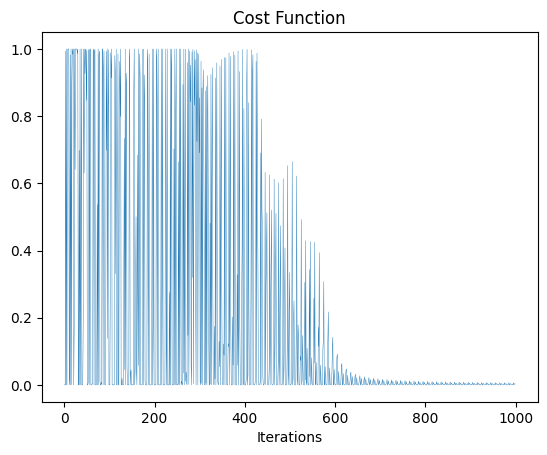

In [291]:
import matplotlib.pyplot as plt
plt.plot(model0.cost, linewidth = 0.3) #plot cost function
plt.title('Cost Function')
plt.xlabel('Iterations')
plt.show()

In [289]:
model0_eval = Evaluation(model0) #make a copy of model to make Evaluation
model0_eval.findAccuracy(x_test,y_test) #find accuracy

NameError: name 'x_test' is not defined

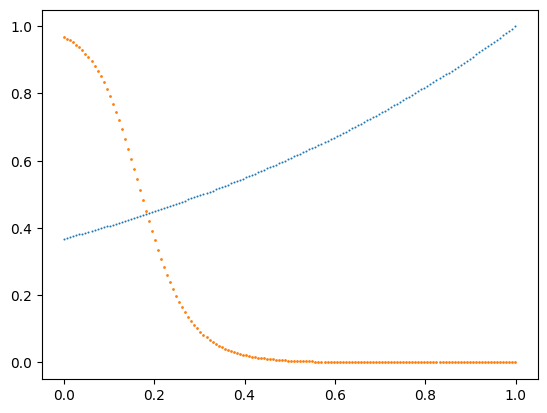

In [ ]:
plt.scatter(x_test, y_test,linewidth = 0.02, s=2)
plt.scatter(x_test, model0_eval.outputFull(x_test),s=1)

In [ ]:
i=30
is_correct = model0_eval.output(x_test[i],y_test[i])
if is_correct:
    print("correct")
else:
    print("incorrect")
plt.imshow(pixel_test[i])
plt.show()

output final layer [0.951]
correct final layer [0.3757219]
confident : 95.14808833076947 %
incorrect


NameError: name 'pixel_test' is not defined

In [ ]:
print(model0_eval.findIncorrect(x_test,y_test))

[0, 1, 3, 4, 6, 7, 8, 10, 12, 13, 14, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 52, 53, 56, 57, 58, 59, 61, 62, 63, 64, 65, 68, 69, 70, 71, 74, 75, 76, 77, 78, 79, 81, 83, 84, 85, 86, 87, 90, 91, 94, 95, 96, 98, 99, 101, 102, 103, 104, 106, 109, 110, 111, 112, 113, 114, 116, 117, 118, 119, 121, 122, 123, 125, 127, 128, 129, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 147, 149, 150, 151, 153, 154, 155, 158, 159, 160, 162, 163, 165, 167, 168, 169, 170, 171, 172, 173, 174, 176, 178, 179, 180, 181, 182, 184, 187, 188, 189, 190, 191, 192, 193, 195, 196, 197, 200, 201, 202, 203, 204, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 216, 219, 220, 222, 223, 224, 226, 227, 229, 231, 232, 233, 235, 236, 237, 238, 239, 241, 242, 243, 244, 245, 246, 247, 249, 250, 252, 253, 254, 255, 256, 257, 258, 259, 260, 262, 263, 264, 266, 267, 268, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286

In [ ]:
#saving model
# import pickle
# pickle.dump(model0, open( "MNIST_classifier_model_0.p", "wb" ))

In [ ]:
# import pickle
# model0 = pickle.load(open( "MNIST_classifier_model_0.p", "rb" ))
# model0 = Evaluation(model0)